In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv("/Users/bartlomiejszafran/Desktop/uber-raw-data-sep14.csv")


In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [5]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 

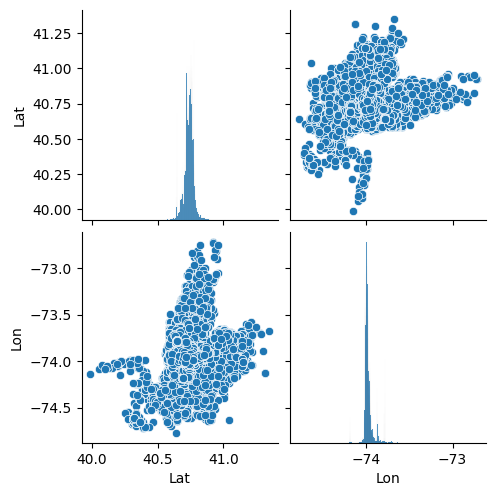

In [6]:
sns.pairplot (data)
plt.show()

In [7]:
data ['Day'] = data ['Date/Time'].apply(lambda x: x.day)
data ['Weekday'] = data ['Date/Time'].apply(lambda x: x.weekday())
data ['Hour'] = data ['Date/Time'].apply(lambda x: x.hour)

In [8]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


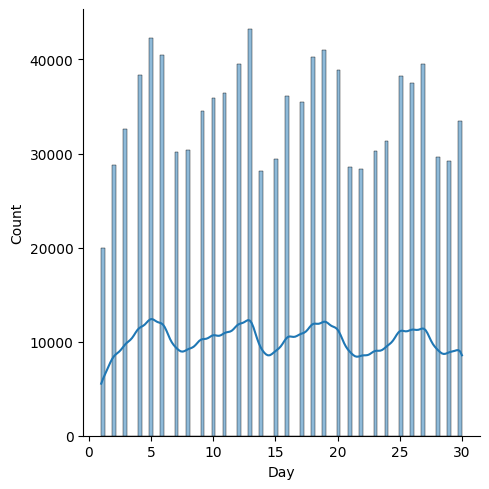

In [9]:
sns.displot (data["Day"], kde= True)
plt.show()


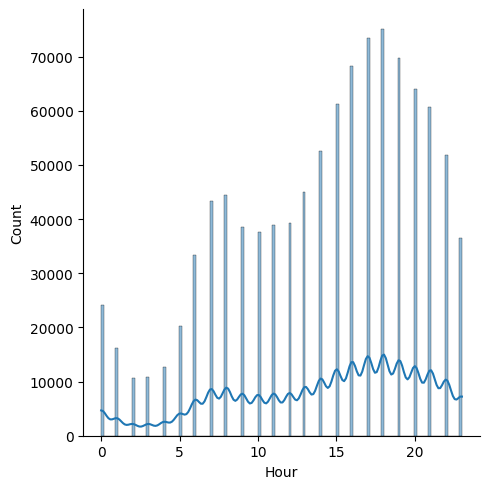

In [10]:
sns.displot (data["Hour"], kde= True)
plt.show()

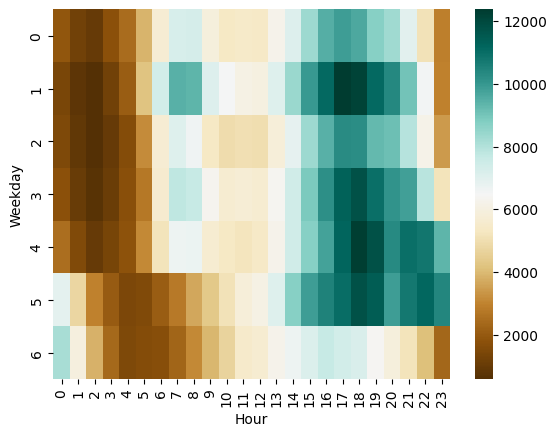

In [11]:
WH = data.groupby (['Weekday', 'Hour']).apply (lambda x: len(x))
WH = WH.unstack()
sns.heatmap (WH, annot = False, cmap= 'BrBG')
plt.show()

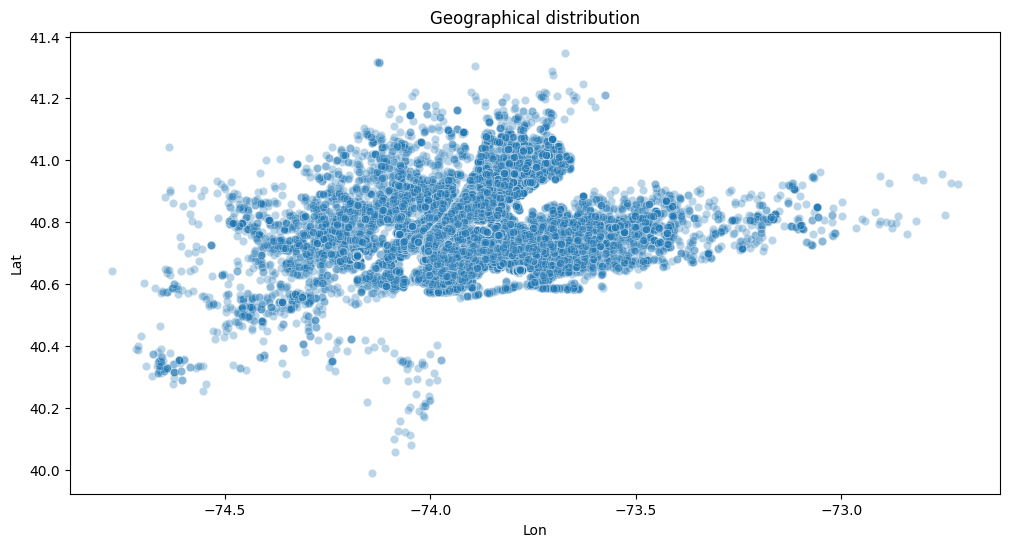

In [12]:
plt.figure (figsize =(12,6))
sns.scatterplot (x='Lon', y='Lat', data = data, alpha = 0.3)
plt.title ('Geographical distribution')
plt.show()


In [4]:
import geopandas as gpd

In [5]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_16883/2260362665.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

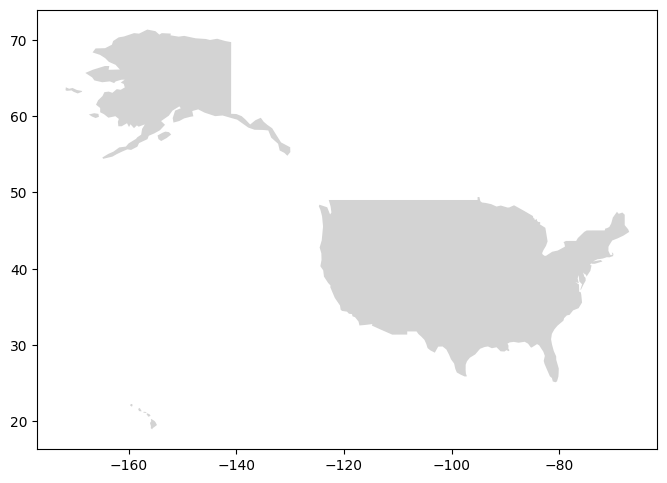

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_16883/1101372187.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


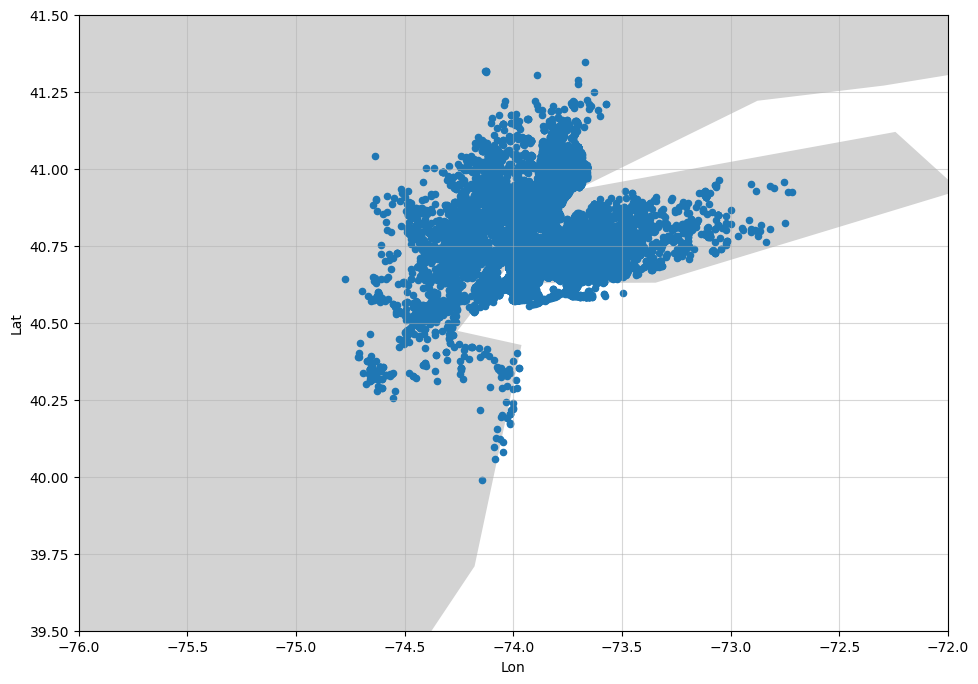

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)


data.plot(x="Lon", y="Lat", kind="scatter", ax=ax)
ax.set_xlim([-76, -72])
ax.set_ylim([39.5, 41.5])   


ax.grid(alpha=0.5)
plt.show()
ax.grid(alpha=0.5)
plt.show()

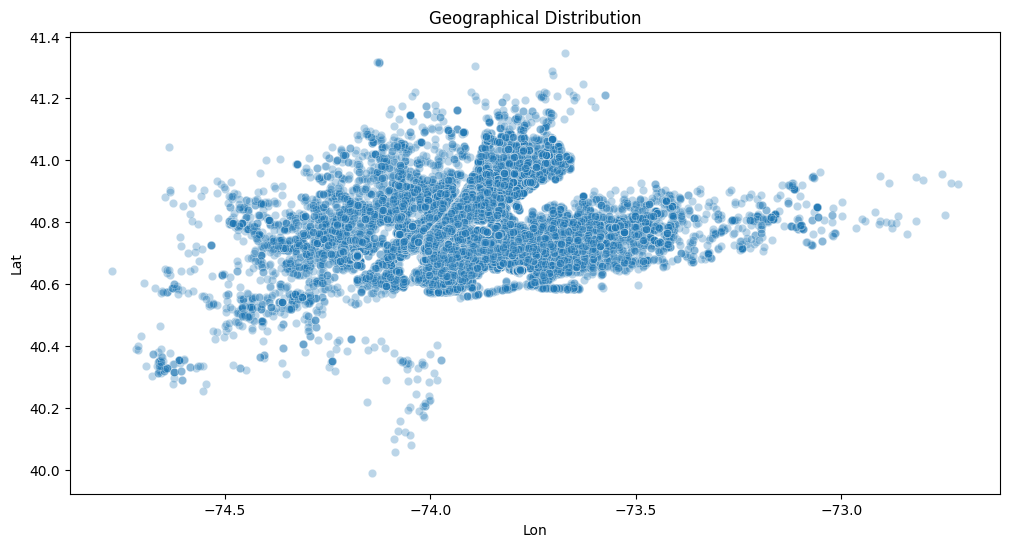

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Lon', y='Lat', data=data, alpha=0.3)
plt.title('Geographical Distribution')
plt.show()

In [13]:
import folium

In [23]:
m = folium.Map(location=(40.5, -74), tiles="cartodb positron")

In [24]:
m